In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def get_spam_training_data(file, labels, sep):
    spam_train = []
    spam_train_labels = []
    with open(file, encoding='utf8') as f:
        for line in f:
            line = line.replace('"', '')
            label, text = line.split(sep=sep, maxsplit=1)
            if label not in labels:
                continue
            spam_train_labels.append(label)
            spam_train.append(text[:-1])
    cv = CountVectorizer(strip_accents='unicode')
    X = cv.fit_transform(spam_train)
    df = pd.DataFrame(X.toarray(),
                      columns=cv.get_feature_names_out())
    return df, spam_train_labels, cv

In [15]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [38]:
X, y, cv =  get_spam_training_data("data/sms_train.csv", ['0', '1'],",")
y = (np.array(y) == '1') * 2 - 1
normalizer = Normalizer()
X = normalizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=137)

In [39]:
def accuracy_score_svm(w, X, y):
    return np.mean(((w @ X.T > 0) * 2 - 1) == y)

In [40]:
from sklearn.svm import LinearSVC
import warnings
from time import time

warnings.filterwarnings("ignore") # intentional non-convergence

liblinear_times = []
liblinear_scores = []

for i in range(100):
    m = LinearSVC(C=1, max_iter=i, fit_intercept=False)
    start_time = time()
    m.fit(X_train, y_train)
    time_used = time() - start_time
    if m.n_iter_ < i:
        break
    liblinear_times.append(
        time_used
    )
    liblinear_scores.append(
        accuracy_score_svm(m.coef_, X_test, y_test)
    )

In [47]:
from sklearn.svm import SVC

libsvm_times = []
libsvm_scores = []

for i in range(200):
    print(i, end="\r")
    m = SVC(kernel="linear", C=1, max_iter=i)
    start_time = time()
    m.fit(X_train, y_train)
    time_used = time() - start_time
    if m.n_iter_ < i:
        break
    libsvm_times.append(
        time_used
    )
    libsvm_scores.append(
        accuracy_score_svm(m.coef_, X_test, y_test)
    )

In [41]:
from Algorithm import CoordinateDescent

In [42]:
cd = CoordinateDescent(C=1., eps=1e-3)

w = cd.fit_process(X_train, y_train)
whist = cd.w_history

2023-06-13T20:42:42.373884 0 3063.0
2023-06-13T20:43:36.378775 1 80.18887820054866
2023-06-13T20:44:30.333282 2 137.02197799036904
2023-06-13T20:45:24.086036 3 91.05931089074255
2023-06-13T20:46:17.963411 4 92.82667392837064
2023-06-13T20:47:15.425844 5 91.11908509978696
2023-06-13T20:48:12.600855 6 91.0849180516083
2023-06-13T20:49:05.597883 7 91.10021318952008
2023-06-13T20:49:58.758205 8 91.09831688240386
2023-06-13T20:50:54.504777 9 91.02935001598843
2023-06-13T20:51:48.857659 10 91.07511204230217
2023-06-13T20:52:42.865572 11 91.05998293869392
2023-06-13T20:53:37.645128 12 91.0694440591608
2023-06-13T20:54:32.049145 13 91.0756257649135
2023-06-13T20:55:26.499628 14 91.07994330307112
2023-06-13T20:56:19.750312 15 91.08271827695629
2023-06-13T20:57:13.170940 16 91.08264122734957
2023-06-13T20:58:06.513909 17 91.08461276975379
2023-06-13T20:58:59.592062 18 91.08607580650526


In [43]:
logs = """
2023-06-13T20:42:42.373884 0 3063.0
2023-06-13T20:43:36.378775 1 80.18887820054866
2023-06-13T20:44:30.333282 2 137.02197799036904
2023-06-13T20:45:24.086036 3 91.05931089074255
2023-06-13T20:46:17.963411 4 92.82667392837064
2023-06-13T20:47:15.425844 5 91.11908509978696
2023-06-13T20:48:12.600855 6 91.0849180516083
2023-06-13T20:49:05.597883 7 91.10021318952008
2023-06-13T20:49:58.758205 8 91.09831688240386
2023-06-13T20:50:54.504777 9 91.02935001598843
2023-06-13T20:51:48.857659 10 91.07511204230217
2023-06-13T20:52:42.865572 11 91.05998293869392
2023-06-13T20:53:37.645128 12 91.0694440591608
2023-06-13T20:54:32.049145 13 91.0756257649135
2023-06-13T20:55:26.499628 14 91.07994330307112
2023-06-13T20:56:19.750312 15 91.08271827695629
2023-06-13T20:57:13.170940 16 91.08264122734957
2023-06-13T20:58:06.513909 17 91.08461276975379
2023-06-13T20:58:59.592062 18 91.08607580650526
"""
datetimes = [entry.split()[0] for entry in logs.split("\n")[1:-1]]
import datetime
ts = [
    datetime.datetime.fromisoformat(dt_str).timestamp()
    for dt_str in datetimes
]
our_times = (np.array(ts) - ts[0])
our_times

array([  0.        ,  54.00489092, 107.95939803, 161.712152  ,
       215.58952713, 273.05195999, 330.22697115, 383.22399902,
       436.38432097, 492.13089299, 546.48377514, 600.49168801,
       655.27124405, 709.67526102, 764.1257441 , 817.37642813,
       870.79705596, 924.14002514, 977.21817803])

In [44]:
our_implementation = [
    accuracy_score_svm(np.zeros(X_test.shape[1]), X_test, y_test)
] + [
    accuracy_score_svm(w, X_test, y_test)
    for w in whist
]

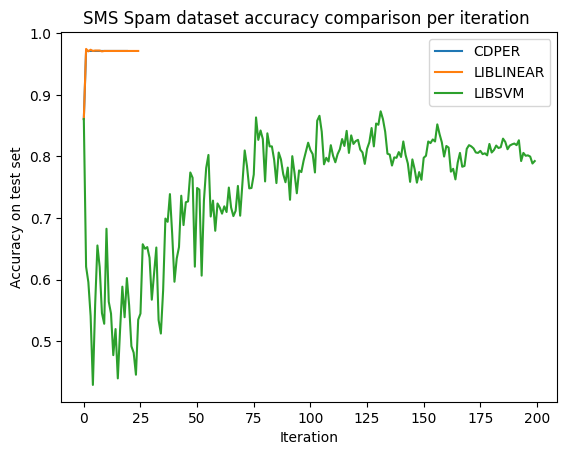

In [48]:
import matplotlib.pyplot as plt
plt.plot(our_implementation)
plt.plot(liblinear_scores)
plt.plot(libsvm_scores)
plt.legend(["CDPER", "LIBLINEAR", "LIBSVM"])
plt.xlabel("Iteration")
plt.ylabel("Accuracy on test set")
plt.title("SMS Spam dataset accuracy comparison per iteration ")
plt.show()

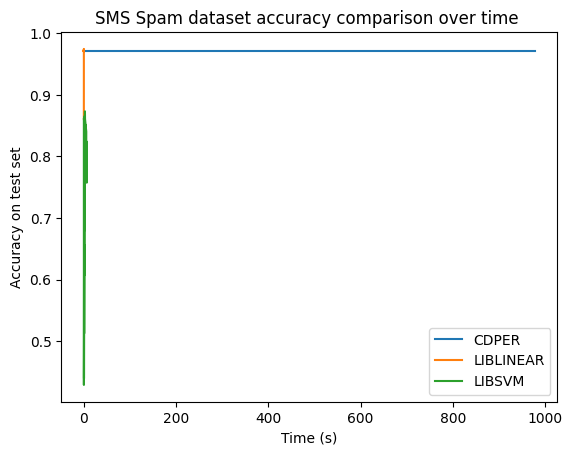

In [49]:
plt.plot(our_times, our_implementation[1:])
plt.plot(liblinear_times, liblinear_scores)
plt.plot(libsvm_times, libsvm_scores)
plt.legend(["CDPER", "LIBLINEAR", "LIBSVM"])
plt.xlabel("Time (s)")
plt.ylabel("Accuracy on test set")
plt.title("SMS Spam dataset accuracy comparison over time ")
plt.show()